# Program Initialization Section
- Bryan Lihardinata (code for Conventional Avocado)
- Eric Jia Jun Hong (code for Organic Avocado)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/blihardinata/Python_Portfolio/main/Avocado/avocado-updated-2020.csv')
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


Datasets: https://www.kaggle.com/timmate/avocado-prices-2020

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046(Small Haas) - Total number of avocados with PLU 4046 sold
- 4225(Large Haas) - Total number of avocados with PLU 4225 sold
- 4770(Extra Large Haas) - Total number of avocados with PLU 4770 sold

PLU = Price Look-Up Code that identifies produce items based upon commodity, variety, and size groups


# Data Investigation, Cleaning and Transformation

In [ ]:
df = df.rename(columns={'4046': 'Small_Haas',
                        '4225': 'Large_Haas',
                        '4770': 'xtra_Large_Haas'})
df.head()

,date,average_price,total_volume,Small_Haas,Large_Haas,xtra_Large_Haas,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


In [ ]:
df.describe()

,average_price,total_volume,Small_Haas,Large_Haas,xtra_Large_Haas,total_bags,small_bags,large_bags,xlarge_bags,year
count,33045.000000,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,33045.000000
mean,1.379941,9.683997e+05,3.023914e+05,2.797693e+05,2.148255e+04,3.646735e+05,2.501980e+05,1.067329e+05,7.742585e+03,2017.460887
std,0.378972,3.934533e+06,1.301026e+06,1.151052e+06,1.001607e+05,1.564004e+06,1.037734e+06,5.167226e+05,4.819803e+04,1.699747
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015.000000
25%,1.100000,1.511895e+04,7.673100e+02,2.712470e+03,0.000000e+00,9.121860e+03,6.478630e+03,4.662900e+02,0.000000e+00,2016.000000
50%,1.350000,1.291170e+05,1.099477e+04,2.343600e+04,1.780900e+02,5.322224e+04,3.687699e+04,6.375860e+03,0.000000e+00,2017.000000
75%,1.620000,5.058285e+05,1.190219e+05,1.352389e+05,5.096530e+03,1.744314e+05,1.206624e+05,4.041723e+04,8.044400e+02,2019.000000
max,3.250000,6.371614e+07,2.274362e+07,2.047057e+07,2.546439e+06,3.168919e+07,2.055041e+07,1.332760e+07,1.403184e+06,2020.000000


In [ ]:
df.shape

(33045, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33045 entries, 0 to 33044
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             33045 non-null  object 
 1   average_price    33045 non-null  float64
 2   total_volume     33045 non-null  float64
 3   Small_Haas       33045 non-null  float64
 4   Large_Haas       33045 non-null  float64
 5   xtra_Large_Haas  33045 non-null  float64
 6   total_bags       33045 non-null  float64
 7   small_bags       33045 non-null  float64
 8   large_bags       33045 non-null  float64
 9   xlarge_bags      33045 non-null  float64
 10  type             33045 non-null  object 
 11  year             33045 non-null  int64  
 12  geography        33045 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 3.3+ MB


In [ ]:
#checking null columns
df.isnull().sum()

date               0
average_price      0
total_volume       0
Small_Haas         0
Large_Haas         0
xtra_Large_Haas    0
total_bags         0
small_bags         0
large_bags         0
xlarge_bags        0
type               0
year               0
geography          0
dtype: int64

In [ ]:
#Change the date into "date" 
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33045 entries, 0 to 33044
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             33045 non-null  datetime64[ns]
 1   average_price    33045 non-null  float64       
 2   total_volume     33045 non-null  float64       
 3   Small_Haas       33045 non-null  float64       
 4   Large_Haas       33045 non-null  float64       
 5   xtra_Large_Haas  33045 non-null  float64       
 6   total_bags       33045 non-null  float64       
 7   small_bags       33045 non-null  float64       
 8   large_bags       33045 non-null  float64       
 9   xlarge_bags      33045 non-null  float64       
 10  type             33045 non-null  object        
 11  year             33045 non-null  int64         
 12  geography        33045 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 3.3+ MB


# Correlation Coefficients

In [ ]:
#Make a copy to type of avocado
df['factor_type'] = df['type'].copy()

In [ ]:
#categorize avodcado into numeric
df['factor_type'] = pd.factorize(df.factor_type)[0]
df.head()

,date,average_price,total_volume,Small_Haas,Large_Haas,xtra_Large_Haas,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,factor_type
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,0
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,1
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,0
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,1
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,0


Text(0.5, 1.0, 'Correlation Heatmap')

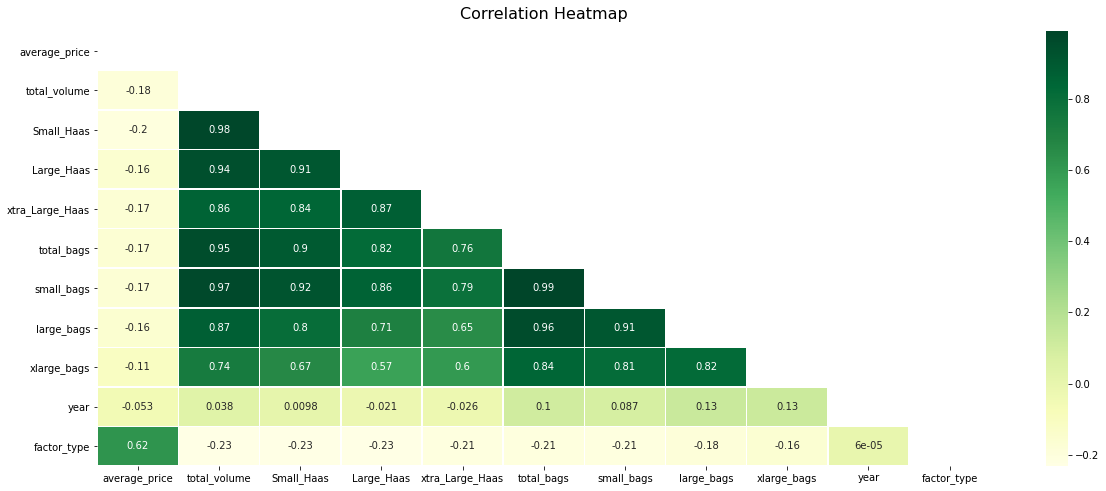

In [ ]:
#customize cmap color
plt.figure(figsize=(20,8))

#np.triu is to eliminate the top half of the triangle 
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, annot=True, cmap='YlGn', linewidths=.5)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=12)


# Conventional Avocado
- California
- New York
- Total US

In [ ]:
dfconventional = df[df["type"]=="conventional"]
dfconventional.head()

,date,average_price,total_volume,Small_Haas,Large_Haas,xtra_Large_Haas,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,factor_type
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,0
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,0
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,0
6,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,2015,Boise,0
8,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,2015,Boston,0


In [ ]:
df.columns

Index(['date', 'average_price', 'total_volume', 'Small_Haas', 'Large_Haas',
       'xtra_Large_Haas', 'total_bags', 'small_bags', 'large_bags',
       'xlarge_bags', 'type', 'year', 'geography', 'factor_type'],
      dtype='object')

In [ ]:
conventional = dfconventional.groupby('date')['average_price'].mean()
conventional = pd.DataFrame(conventional)
conventional.tail()

,average_price
date,
2020-11-01,0.962963
2020-11-08,0.943148
2020-11-15,0.947222
2020-11-22,0.928889
2020-11-29,0.924074


In [ ]:
#looking at the moving average
#window = 12 -> moving average at monthly level 
#window = 365 -> moving average at daily level
m_avg = conventional.rolling(window=12).mean()
print(m_avg)

            average_price
date                     
2015-01-04            NaN
2015-01-11            NaN
2015-01-18            NaN
2015-01-25            NaN
2015-02-01            NaN
...                   ...
2020-11-01       0.977901
2020-11-08       0.973441
2020-11-15       0.970432
2020-11-22       0.967068
2020-11-29       0.960386

[306 rows x 1 columns]


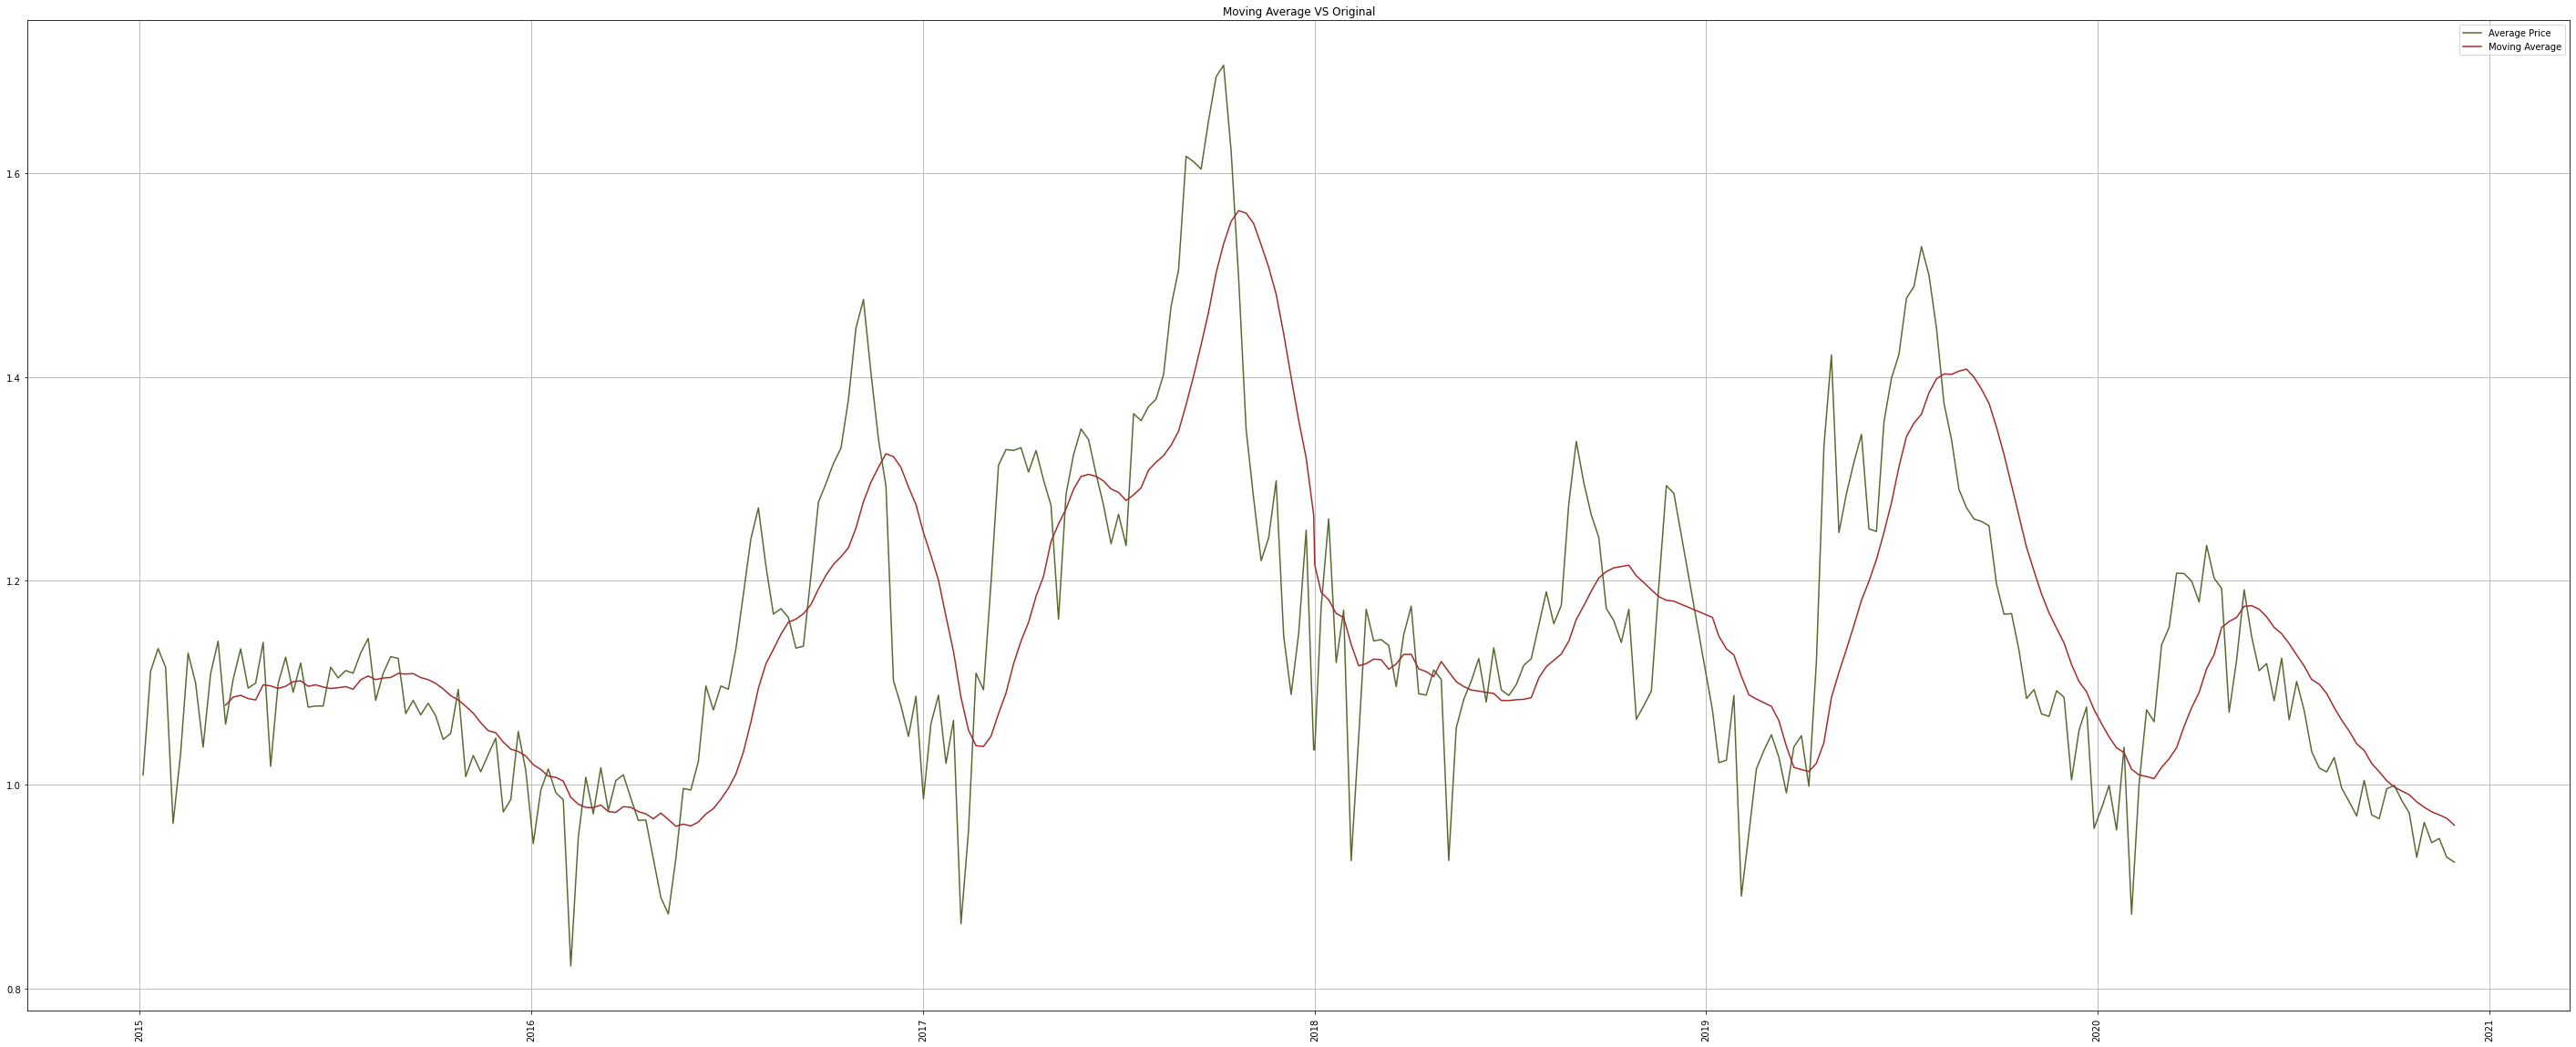

In [ ]:
#Plot rolling statistics
plt.figure(figsize = (50,20))
original = plt.plot(conventional,  color = 'DarkOliveGreen', label = 'Average Price')
mov_avg = plt.plot(m_avg, color = 'brown', label = 'Moving Average')
plt.legend(loc = 'best')
plt.xticks(rotation = 90)
plt.title('Moving Average VS Original')
plt.grid()
plt.show()

## Conventional Avocado: California

In [ ]:
conventional_cali = dfconventional.loc[dfconventional.geography == "California"]
conventional_cali.head()

,date,average_price,total_volume,Small_Haas,Large_Haas,xtra_Large_Haas,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,factor_type
12,2015-01-04,0.93,5777334.90,2843648.26,2267755.26,137479.64,528451.74,477193.38,47882.56,3375.80,conventional,2015,California,0
120,2015-01-11,0.92,6024932.34,2889591.29,2485720.10,103573.42,546047.53,510560.41,31874.03,3613.09,conventional,2015,California,0
228,2015-01-18,1.02,5570915.26,2780859.66,2108450.36,121614.31,559990.93,520299.26,36501.18,3190.49,conventional,2015,California,0
336,2015-01-25,1.06,4929884.26,2380955.61,1827783.28,150535.50,570609.87,521004.15,46809.48,2796.24,conventional,2015,California,0
444,2015-02-01,0.85,9032180.67,4794142.14,3460743.80,177145.49,600149.24,556205.20,41203.20,2740.84,conventional,2015,California,0


In [ ]:
df_conv_cali = pd.DataFrame(conventional_cali.groupby("date")["average_price"].mean())
df_conv_cali

,average_price
date,
2015-01-04,0.93
2015-01-11,0.92
2015-01-18,1.02
2015-01-25,1.06
2015-02-01,0.85
...,...
2020-11-01,1.16
2020-11-08,1.01
2020-11-15,1.13


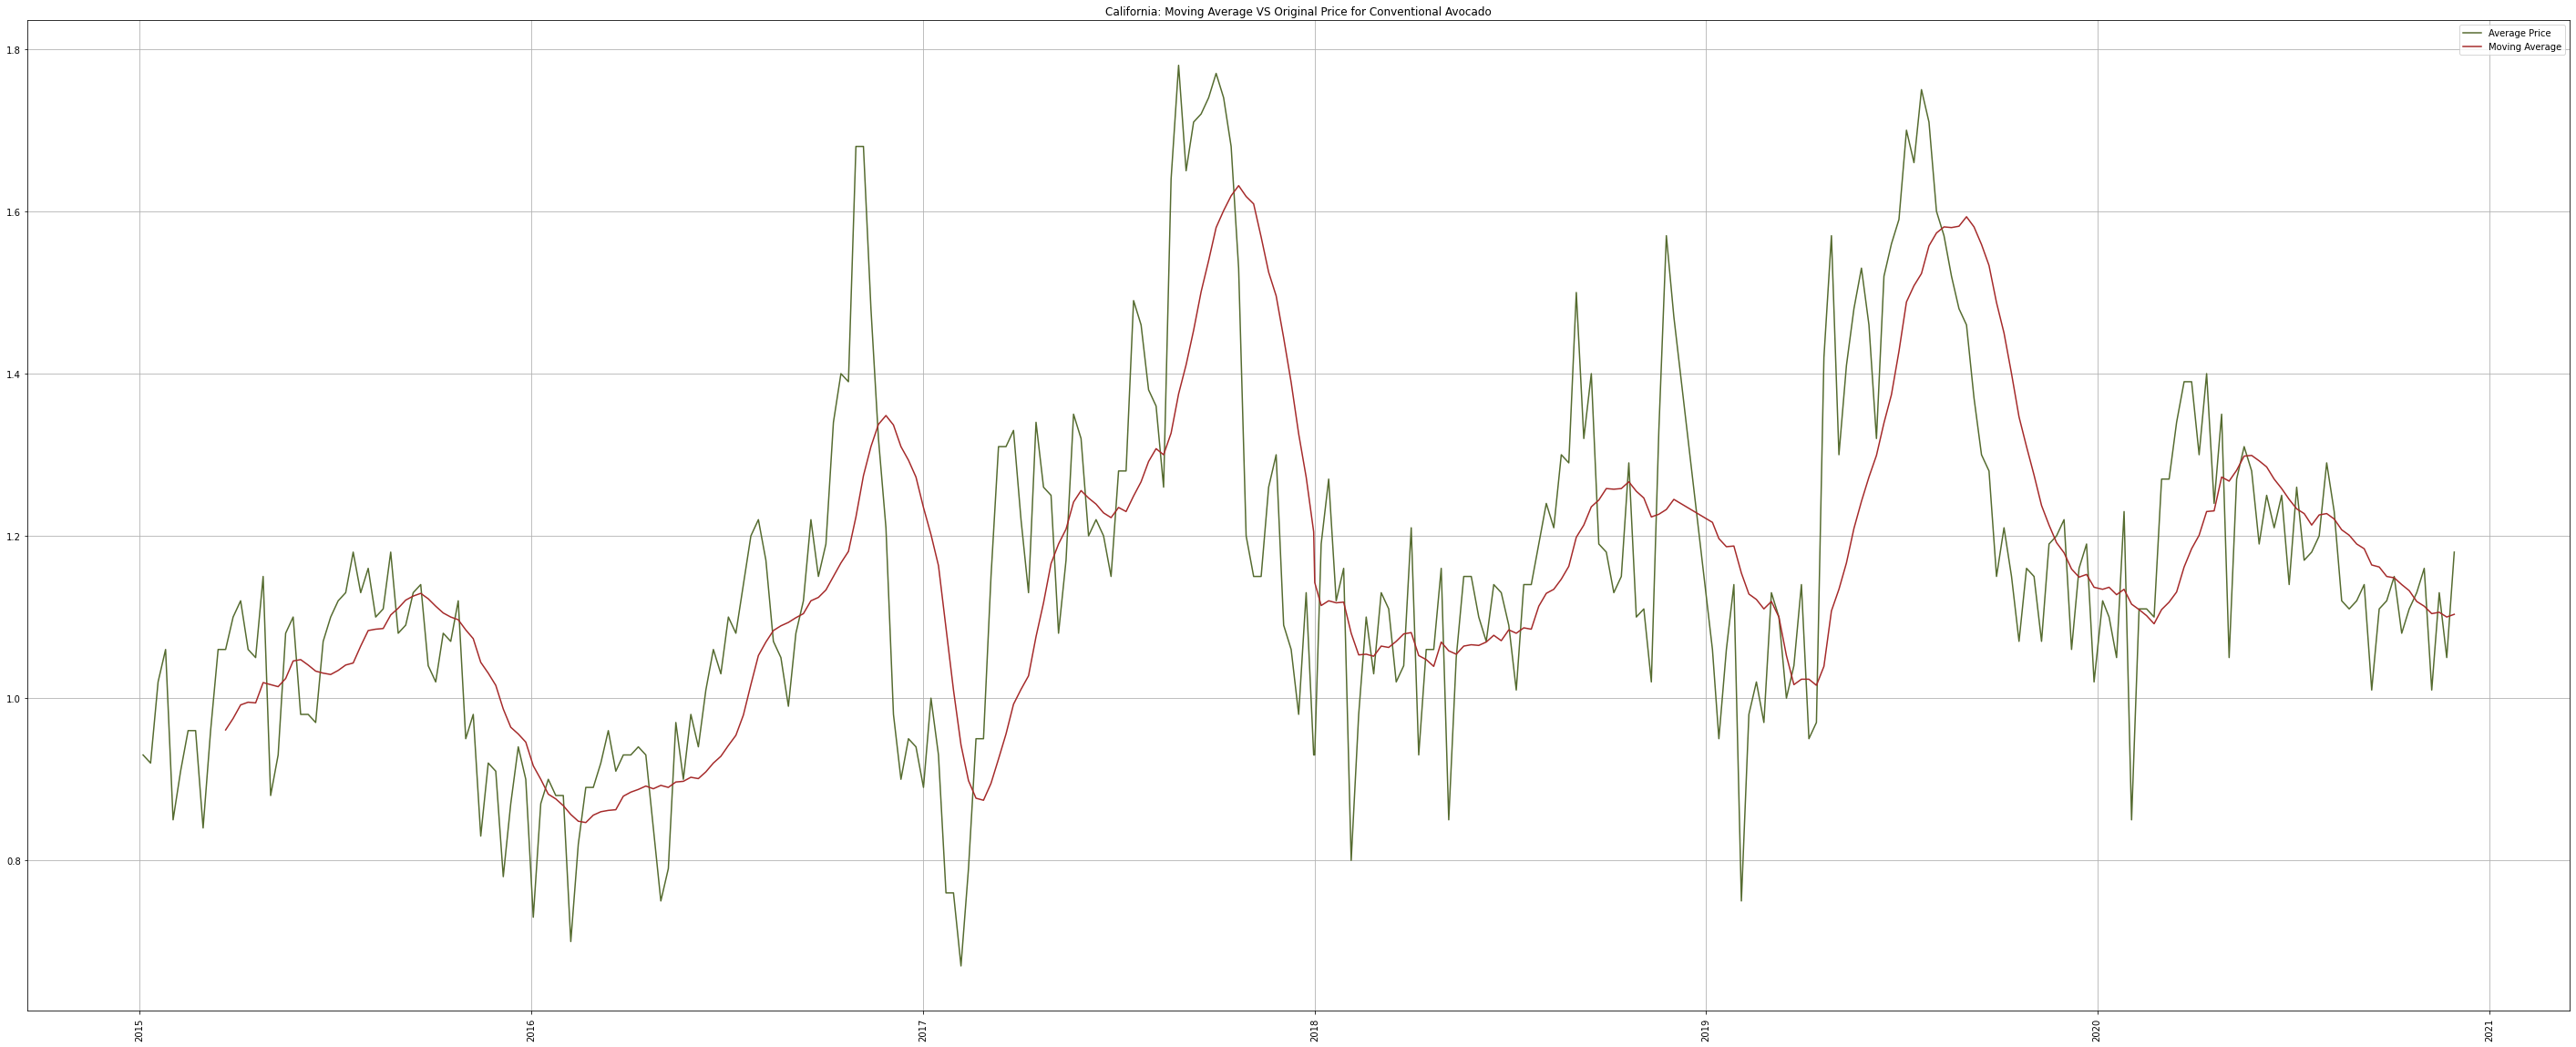

In [ ]:
#looking at the moving average
#window = 12 -> moving average at monthly level 
#window = 365 -> moving average at daily level
conv_cali = df_conv_cali.rolling(window=12).mean()

#Plot rolling statistics
plt.figure(figsize = (50,20))
original = plt.plot(df_conv_cali,  color = 'DarkOliveGreen', label = 'Average Price')
mov_avg = plt.plot(conv_cali, color = 'brown', label = 'Moving Average')
plt.legend(loc = 'best')
plt.xticks(rotation = 90)
plt.title('California: Moving Average VS Original Price for Conventional Avocado')
plt.grid()
plt.show()

### Check Seasonality/Trend

Resources: https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/
- Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components.
- Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting.

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

Observed = Actual Data

Trend = identified by trendlines or price action that highlight when the price is making higher swing highs and higher swing lows for an uptrend, or lower swing lows and lower swing highs for a downtrend

Seasonality = a characteristic of a time series in which the data experiences regular and predictable changes that recur every calendar year

Residual = error / the difference between observed and forecast

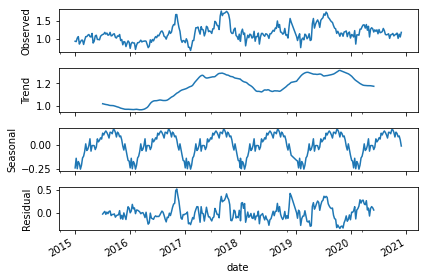

In [ ]:
#An additive model is linear where changes over time are consistently made by the same amount.
#y(t) = Level + Trend + Seasonality + Noise
result = seasonal_decompose(df_conv_cali, model= 'additive', freq=52)
result.plot()
plt.show()



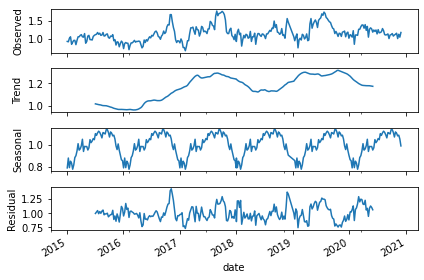

In [ ]:
#A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time
#y(t) = Level * Trend * Seasonality * Noise
result = seasonal_decompose(df_conv_cali, model= 'multiplicative', freq=52)
result.plot()
plt.show()



Both additive and multiplicative model show that:
- Data has trend and seasonality
- Data has an upward trend as shown under trend graph
- Data has a yearly seasonal pattern as shown that average price increases during 2nd half of the year. 
- Data is not a linear trend

### Facebook Forecasting

- https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-prophet-in-python-3
- https://facebook.github.io/prophet/docs/quick_start.html

In [ ]:
from fbprophet import  Prophet

In [ ]:
df_conv_cali_prop = df_conv_cali.copy()
df_conv_cali_prop = df_conv_cali_prop.reset_index()
df_conv_cali_prop.head()

,date,average_price
0,2015-01-04,0.93
1,2015-01-11,0.92
2,2015-01-18,1.02
3,2015-01-25,1.06
4,2015-02-01,0.85


In [ ]:
#columns must be changed to ds (date) and y (target variable)
df_conv_cali_prop.columns = ['ds', 'y']

In [ ]:
#0.95 = 95% confidence interval
m = Prophet(interval_width=0.95)
m.fit(df_conv_cali_prop)

#periods = 52 -> 52 datestamps later
#freq = 'W' -> weekly

future = m.make_future_dataframe(periods = 52, freq='W') 
future.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
353,2021-10-31
354,2021-11-07
355,2021-11-14
356,2021-11-21
357,2021-11-28


In [ ]:
#build a forecast model
#yhat = predicted value

forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
353,2021-10-31,1.074929,0.830838,1.479406,1.055694,1.093782,0.063396,0.063396,0.063396,0.033761,0.033761,0.033761,0.029635,0.029635,0.029635,0.0,0.0,0.0,1.138325
354,2021-11-07,1.073894,0.811550,1.431760,1.054024,1.093276,0.038257,0.038257,0.038257,0.033761,0.033761,0.033761,0.004496,0.004496,0.004496,0.0,0.0,0.0,1.112150
355,2021-11-14,1.072858,0.788771,1.428134,1.052524,1.092934,0.048072,0.048072,0.048072,0.033761,0.033761,0.033761,0.014311,0.014311,0.014311,0.0,0.0,0.0,1.120930
356,2021-11-21,1.071823,0.823195,1.440016,1.051024,1.092506,0.064527,0.064527,0.064527,0.033761,0.033761,0.033761,0.030765,0.030765,0.030765,0.0,0.0,0.0,1.136350
357,2021-11-28,1.070788,0.765862,1.443595,1.049581,1.092160,0.044985,0.044985,0.044985,0.033761,0.033761,0.033761,0.011223,0.011223,0.011223,0.0,0.0,0.0,1.115772


Text(0.5, 1.05, 'California Conventional Avocado Price in 52 Weeks Span')

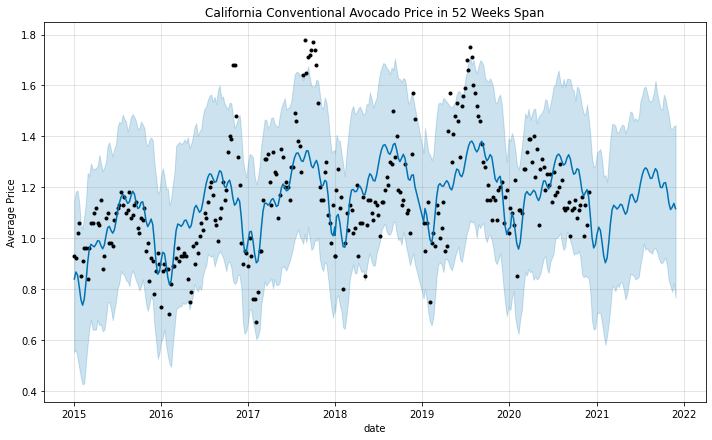

In [ ]:
#the black dots are the actual value
#blue line = the forecasted value
#uncertainty level = shaded-blue area
m.plot(forecast, xlabel= 'date', ylabel='Average Price')
plt.title('California Conventional Avocado Price in 52 Weeks Span', y = 1.05)

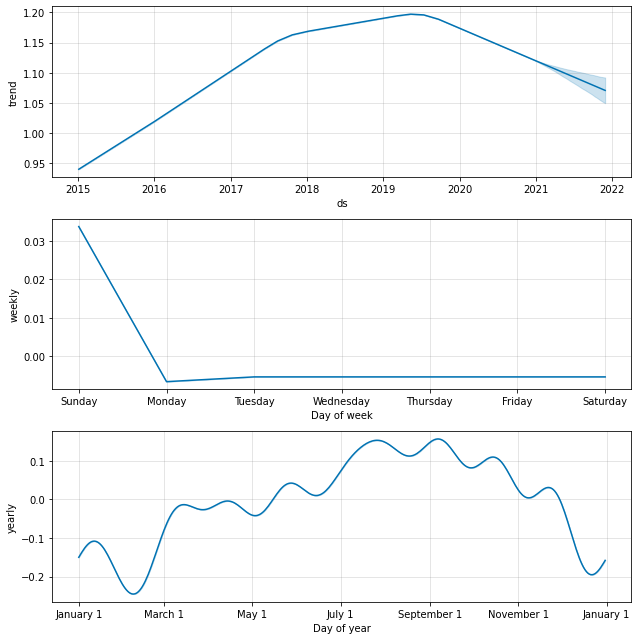

In [ ]:
fig2 = m.plot_components(forecast)


The trend graph shows that the average price of conventional avocado continues to drop starting in the middle of 2019. The trend forecasts that the price will continue to drop in 2 years from now. COVID-19 pandemic definitely affects the consumption of Avocado fruits. 

### Creating the final dataset in Excel

In [ ]:
dfcon_cali = forecast[['ds', 'trend', 'yhat', 'yhat_lower', 'yhat_upper']]
dfcon_cali = dfcon_cali.set_index('ds')
dfcon_cali.head()

,trend,yhat,yhat_lower,yhat_upper
ds,,,,
2015-01-04,0.940082,0.839206,0.552439,1.149774
2015-01-11,0.941608,0.866699,0.561695,1.182698
2015-01-18,0.943134,0.853837,0.528867,1.187182
2015-01-25,0.944661,0.807976,0.489276,1.135499
2015-02-01,0.946187,0.758053,0.452344,1.052883


In [ ]:
conventional_cali_final = conventional_cali.copy()

In [ ]:
conventional_cali_final = conventional_cali_final.set_index('date')
conventional_cali_final.head()

,average_price,total_volume,Small_Haas,Large_Haas,xtra_Large_Haas,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,factor_type
date,,,,,,,,,,,,,
2015-01-04,0.93,5777334.90,2843648.26,2267755.26,137479.64,528451.74,477193.38,47882.56,3375.80,conventional,2015,California,0
2015-01-11,0.92,6024932.34,2889591.29,2485720.10,103573.42,546047.53,510560.41,31874.03,3613.09,conventional,2015,California,0
2015-01-18,1.02,5570915.26,2780859.66,2108450.36,121614.31,559990.93,520299.26,36501.18,3190.49,conventional,2015,California,0
2015-01-25,1.06,4929884.26,2380955.61,1827783.28,150535.50,570609.87,521004.15,46809.48,2796.24,conventional,2015,California,0
2015-02-01,0.85,9032180.67,4794142.14,3460743.80,177145.49,600149.24,556205.20,41203.20,2740.84,conventional,2015,California,0


In [ ]:
dfcon_cali = pd.concat([conventional_cali_final, dfcon_cali], axis = 1, join= 'outer')
dfcon_cali = dfcon_cali.reset_index()
dfcon_cali = dfcon_cali.rename(columns={'index': 'date'})
dfcon_cali.head()

,date,average_price,total_volume,Small_Haas,Large_Haas,xtra_Large_Haas,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,factor_type,trend,yhat,yhat_lower,yhat_upper
0,2015-01-04,0.93,5777334.90,2843648.26,2267755.26,137479.64,528451.74,477193.38,47882.56,3375.80,conventional,2015.0,California,0.0,0.940082,0.839206,0.552439,1.149774
1,2015-01-11,0.92,6024932.34,2889591.29,2485720.10,103573.42,546047.53,510560.41,31874.03,3613.09,conventional,2015.0,California,0.0,0.941608,0.866699,0.561695,1.182698
2,2015-01-18,1.02,5570915.26,2780859.66,2108450.36,121614.31,559990.93,520299.26,36501.18,3190.49,conventional,2015.0,California,0.0,0.943134,0.853837,0.528867,1.187182
3,2015-01-25,1.06,4929884.26,2380955.61,1827783.28,150535.50,570609.87,521004.15,46809.48,2796.24,conventional,2015.0,California,0.0,0.944661,0.807976,0.489276,1.135499
4,2015-02-01,0.85,9032180.67,4794142.14,3460743.80,177145.49,600149.24,556205.20,41203.20,2740.84,conventional,2015.0,California,0.0,0.946187,0.758053,0.452344,1.052883


In [ ]:
dfcon_cali.to_excel(r'/content/drive/MyDrive/MSBA_Colab_2020/ML_Algorithms/dfcon_cali.xlsx', index=False, header=True)

# Organic Avocado

In [ ]:
dforganic = df[df["type"]=="organic"]
dforganic.head()

,date,average_price,total_volume,Small_Haas,Large_Haas,xtra_Large_Haas,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,factor_type
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,1
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,1
5,2015-01-04,1.29,19137.28,8040.64,6557.47,657.48,3881.69,3881.69,0.00,0.0,organic,2015,Baltimore/Washington,1
7,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise,1
9,2015-01-04,1.83,2192.13,8.66,939.43,0.00,1244.04,1244.04,0.00,0.0,organic,2015,Boston,1


In [ ]:
organic = dforganic.groupby('date')['average_price'].mean()
organic = pd.DataFrame(organic)
organic.tail()

,average_price
date,
2020-11-01,1.380185
2020-11-08,1.382407
2020-11-15,1.408148
2020-11-22,1.409815
2020-11-29,1.430926


In [ ]:
#looking at the moving average
#window = 12 -> moving average at monthly level 
#window = 365 -> moving average at daily level
organic_m_avg = organic.rolling(window=12).mean()
print(organic_m_avg)

            average_price
date                     
2015-01-04            NaN
2015-01-11            NaN
2015-01-18            NaN
2015-01-25            NaN
2015-02-01            NaN
...                   ...
2020-11-01       1.516651
2020-11-08       1.499136
2020-11-15       1.483627
2020-11-22       1.469969
2020-11-29       1.455123

[306 rows x 1 columns]


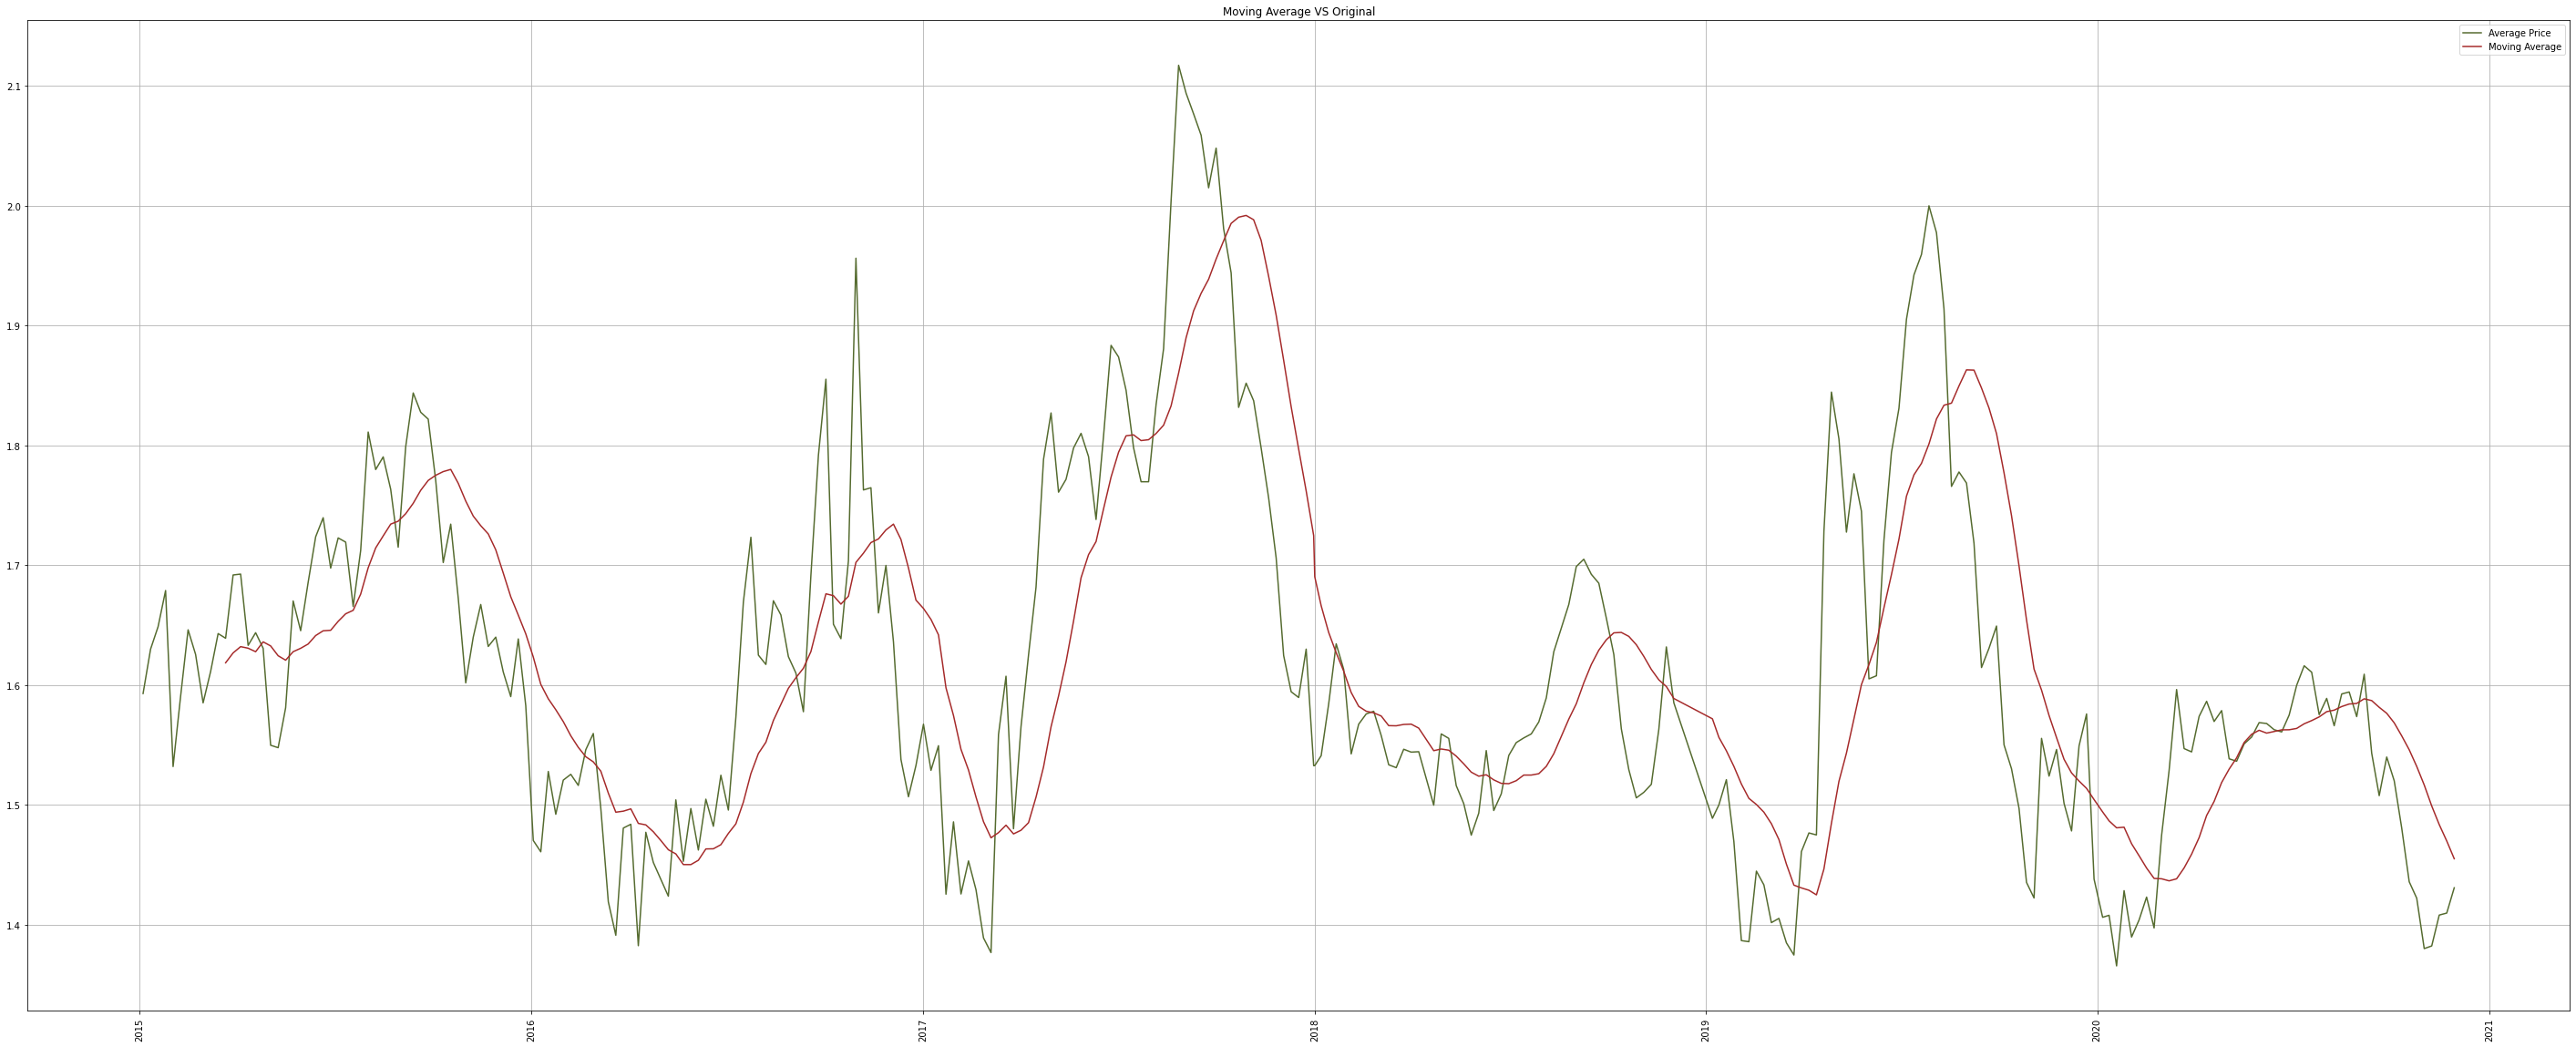

In [ ]:
#Plot rolling statistics
plt.figure(figsize = (50,20))
org_original = plt.plot(organic,  color = 'DarkOliveGreen', label = 'Average Price')
org_mov_avg = plt.plot(organic_m_avg, color = 'brown', label = 'Moving Average')
plt.legend(loc = 'best')
plt.xticks(rotation = 90)
plt.title('Moving Average VS Original')
plt.grid()
plt.show()

## Organic Avocado: California

In [ ]:
organic_cali = dforganic.loc[dforganic.geography == "California"]
organic_cali.head()

,date,average_price,total_volume,Small_Haas,Large_Haas,xtra_Large_Haas,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,factor_type
13,2015-01-04,1.24,142349.77,107490.73,25711.96,2.93,9144.15,9144.15,0.0,0.0,organic,2015,California,1
121,2015-01-11,1.10,158110.68,123712.51,25975.27,1.47,8421.43,8421.43,0.0,0.0,organic,2015,California,1
229,2015-01-18,1.24,195207.60,123138.29,58616.16,0.00,13453.15,13453.15,0.0,0.0,organic,2015,California,1
337,2015-01-25,1.30,121698.02,80952.24,28216.13,0.00,12529.65,12529.65,0.0,0.0,organic,2015,California,1
445,2015-02-01,1.11,196031.90,142332.45,41999.51,2.92,11697.02,11697.02,0.0,0.0,organic,2015,California,1


In [ ]:
df_org_cali = pd.DataFrame(organic_cali.groupby("date")["average_price"].mean())
df_org_cali

,average_price
date,
2015-01-04,1.24
2015-01-11,1.10
2015-01-18,1.24
2015-01-25,1.30
2015-02-01,1.11
...,...
2020-11-01,1.42
2020-11-08,1.42
2020-11-15,1.71


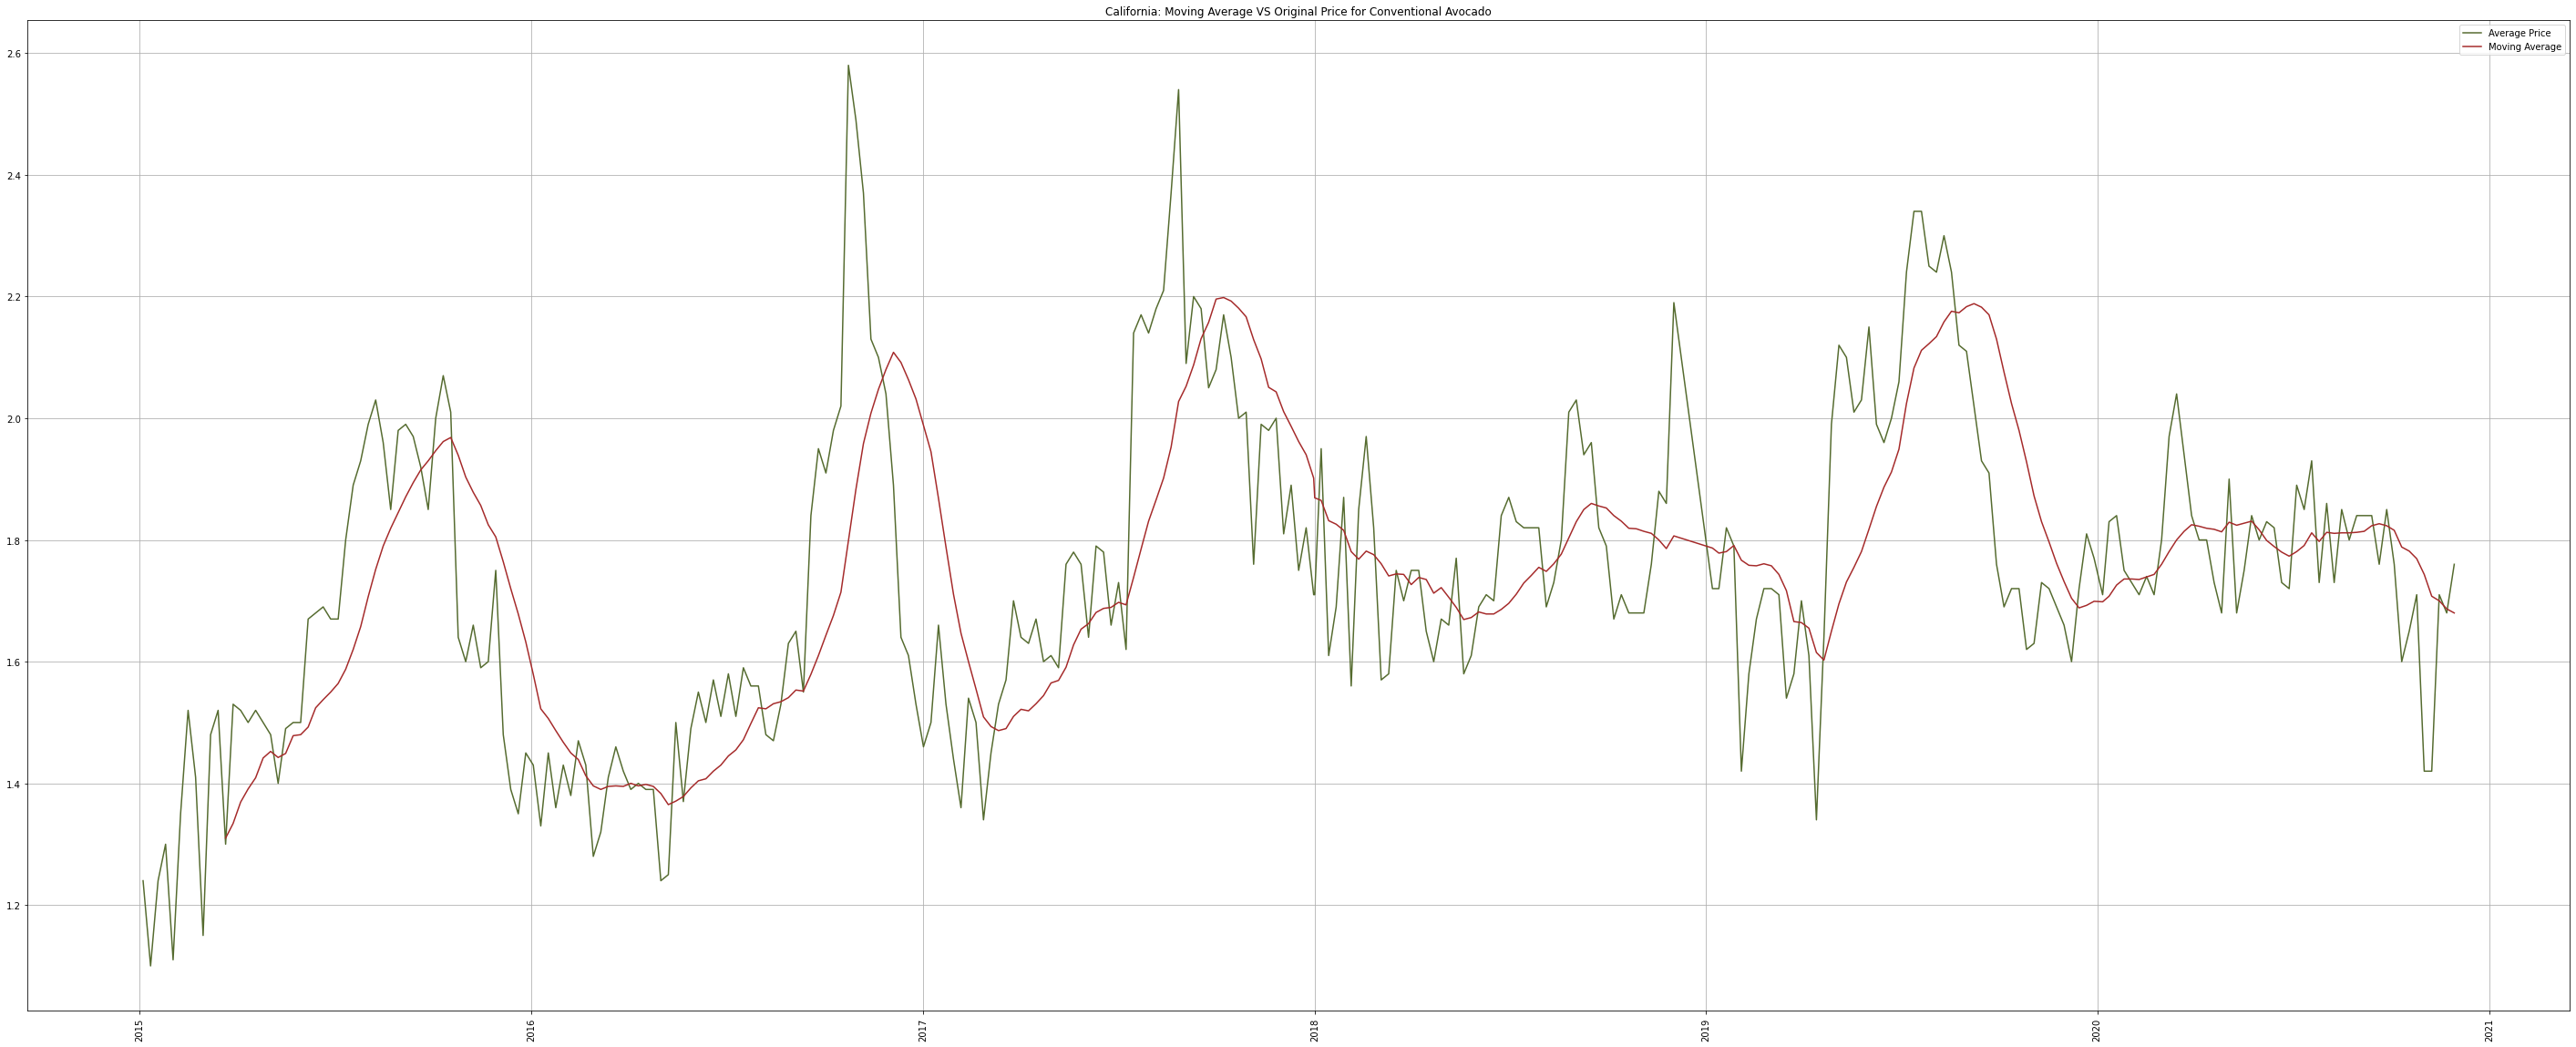

In [ ]:
#looking at the moving average
#window = 12 -> moving average at monthly level 
#window = 365 -> moving average at daily level
org_cali = df_org_cali.rolling(window=12).mean()

#Plot rolling statistics
plt.figure(figsize = (50,20))
original = plt.plot(df_org_cali,  color = 'DarkOliveGreen', label = 'Average Price')
mov_avg = plt.plot(org_cali, color = 'brown', label = 'Moving Average')
plt.legend(loc = 'best')
plt.xticks(rotation = 90)
plt.title('California: Moving Average VS Original Price for Conventional Avocado')
plt.grid()
plt.show()

### Check Seasonality/Trend

Resources: https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/
- Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components.
- Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting.

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

Observed = Actual Data

Trend = identified by trendlines or price action that highlight when the price is making higher swing highs and higher swing lows for an uptrend, or lower swing lows and lower swing highs for a downtrend

Seasonality = a characteristic of a time series in which the data experiences regular and predictable changes that recur every calendar year

Residual = error / the difference between observed and forecast

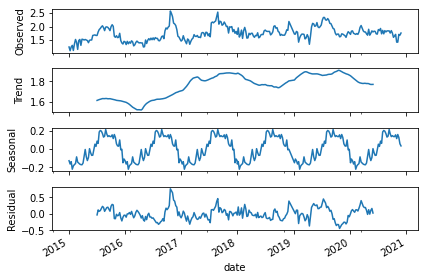

In [ ]:
#An additive model is linear where changes over time are consistently made by the same amount.
#y(t) = Level + Trend + Seasonality + Noise
result = seasonal_decompose(df_org_cali, model= 'additive', freq=52)
result.plot()
plt.show()



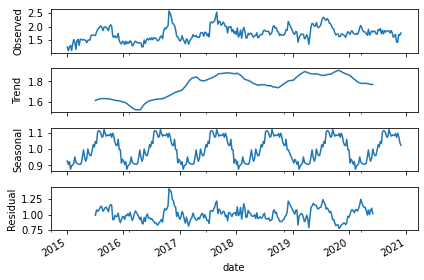

In [ ]:
#A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time
#y(t) = Level * Trend * Seasonality * Noise
result = seasonal_decompose(df_org_cali, model= 'multiplicative', freq=52)
result.plot()
plt.show()



Both additive and multiplicative model show that:
- Data has trend and seasonality
- Data has an upward trend as shown under trend graph
- Data has a yearly seasonal pattern as shown that average price increases during 2nd half of the year. 
- Data is not a linear trend

### Facebook Forecasting

- https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-prophet-in-python-3
- https://facebook.github.io/prophet/docs/quick_start.html

In [ ]:
from fbprophet import  Prophet

In [ ]:
df_org_cali_prop = df_org_cali.copy()
df_org_cali_prop = df_org_cali_prop.reset_index()
df_org_cali_prop.head()

,date,average_price
0,2015-01-04,1.24
1,2015-01-11,1.10
2,2015-01-18,1.24
3,2015-01-25,1.30
4,2015-02-01,1.11


In [ ]:
#columns must be changed to ds (date) and y (target variable)
df_org_cali_prop.columns = ['ds', 'y']

In [ ]:
#0.95 = 95% confidence interval
m_organic = Prophet(interval_width=0.95)
m_organic.fit(df_org_cali_prop)

#periods = 52 -> 52 datestamps later
#freq = 'W' -> weekly

future = m_organic.make_future_dataframe(periods = 52, freq='W') 
future.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
353,2021-10-31
354,2021-11-07
355,2021-11-14
356,2021-11-21
357,2021-11-28


In [ ]:
#build a forecast model
#yhat = predicted value

forecast_org = m_organic.predict(future)
forecast_org.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
353,2021-10-31,1.508420,1.356545,2.092523,1.487689,1.533547,0.209172,0.209172,0.209172,0.147041,0.147041,0.147041,0.062132,0.062132,0.062132,0.0,0.0,0.0,1.717593
354,2021-11-07,1.506932,1.352309,2.067307,1.485731,1.532848,0.190473,0.190473,0.190473,0.147041,0.147041,0.147041,0.043432,0.043432,0.043432,0.0,0.0,0.0,1.697405
355,2021-11-14,1.505443,1.372691,2.106203,1.483722,1.532127,0.202312,0.202312,0.202312,0.147041,0.147041,0.147041,0.055271,0.055271,0.055271,0.0,0.0,0.0,1.707755
356,2021-11-21,1.503955,1.358278,2.095777,1.481745,1.531359,0.228337,0.228337,0.228337,0.147041,0.147041,0.147041,0.081296,0.081296,0.081296,0.0,0.0,0.0,1.732292
357,2021-11-28,1.502467,1.400714,2.088996,1.479153,1.530559,0.229612,0.229612,0.229612,0.147041,0.147041,0.147041,0.082571,0.082571,0.082571,0.0,0.0,0.0,1.732078


Text(0.5, 1.05, 'California Organic Avocado Price in 52 Weeks Span')

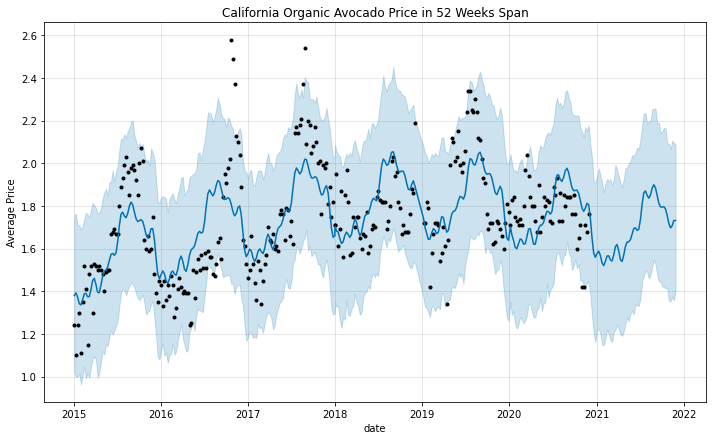

In [ ]:
#the black dots are the actual value
#blue line = the forecasted value
#uncertainty level = shaded-blue area
m_organic.plot(forecast_org, xlabel= 'date', ylabel='Average Price')
plt.title('California Organic Avocado Price in 52 Weeks Span', y = 1.05)

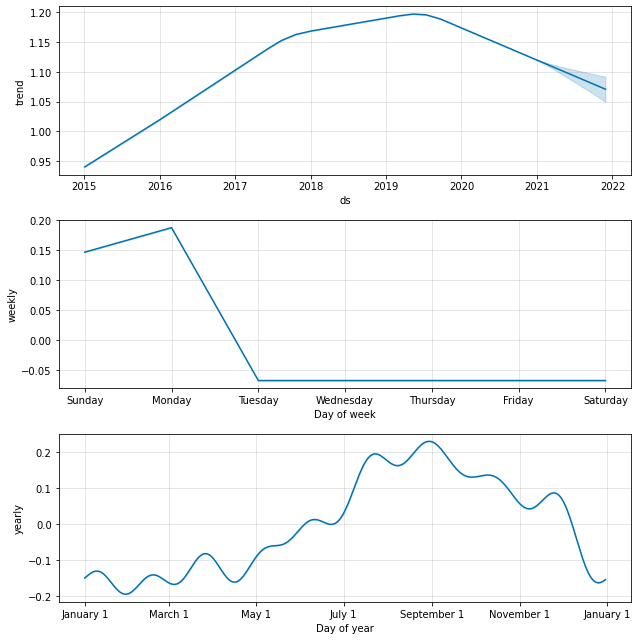

In [ ]:
fig2 = m_organic.plot_components(forecast)


The trend graph shows that the average price of organic avocado continues to drop starting in the middle of 2019. The trend forecasts that the price will continue to drop in 2 years from now. COVID-19 pandemic definitely affects the consumption of Avocado fruits. 

### Creating the final dataset in Excel

In [ ]:
dforg_cali = forecast_org[['ds', 'trend', 'yhat', 'yhat_lower', 'yhat_upper']]
dforg_cali = dforg_cali.set_index('ds')
dforg_cali.head()

,trend,yhat,yhat_lower,yhat_upper
ds,,,,
2015-01-04,1.373151,1.379858,1.026537,1.757631
2015-01-11,1.375124,1.392311,0.997080,1.761776
2015-01-18,1.377097,1.372656,1.000598,1.708289
2015-01-25,1.379070,1.341948,1.015061,1.710124
2015-02-01,1.381043,1.335790,0.962505,1.690310


In [ ]:
organic_cali_final = organic_cali.copy()

In [ ]:
organic_cali_final = organic_cali_final.set_index('date')
organic_cali_final.head()

,average_price,total_volume,Small_Haas,Large_Haas,xtra_Large_Haas,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,factor_type
date,,,,,,,,,,,,,
2015-01-04,1.24,142349.77,107490.73,25711.96,2.93,9144.15,9144.15,0.0,0.0,organic,2015,California,1
2015-01-11,1.10,158110.68,123712.51,25975.27,1.47,8421.43,8421.43,0.0,0.0,organic,2015,California,1
2015-01-18,1.24,195207.60,123138.29,58616.16,0.00,13453.15,13453.15,0.0,0.0,organic,2015,California,1
2015-01-25,1.30,121698.02,80952.24,28216.13,0.00,12529.65,12529.65,0.0,0.0,organic,2015,California,1
2015-02-01,1.11,196031.90,142332.45,41999.51,2.92,11697.02,11697.02,0.0,0.0,organic,2015,California,1


In [ ]:
dforg_cali = pd.concat([organic_cali_final, dforg_cali], axis = 1, join= 'outer')
dforg_cali = dforg_cali.reset_index()
dforg_cali = dforg_cali.rename(columns={'index': 'date'})
dforg_cali.head()

,date,average_price,total_volume,Small_Haas,Large_Haas,xtra_Large_Haas,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,factor_type,trend,yhat,yhat_lower,yhat_upper
0,2015-01-04,1.24,142349.77,107490.73,25711.96,2.93,9144.15,9144.15,0.0,0.0,organic,2015.0,California,1.0,1.373151,1.379858,1.026537,1.757631
1,2015-01-11,1.10,158110.68,123712.51,25975.27,1.47,8421.43,8421.43,0.0,0.0,organic,2015.0,California,1.0,1.375124,1.392311,0.997080,1.761776
2,2015-01-18,1.24,195207.60,123138.29,58616.16,0.00,13453.15,13453.15,0.0,0.0,organic,2015.0,California,1.0,1.377097,1.372656,1.000598,1.708289
3,2015-01-25,1.30,121698.02,80952.24,28216.13,0.00,12529.65,12529.65,0.0,0.0,organic,2015.0,California,1.0,1.379070,1.341948,1.015061,1.710124
4,2015-02-01,1.11,196031.90,142332.45,41999.51,2.92,11697.02,11697.02,0.0,0.0,organic,2015.0,California,1.0,1.381043,1.335790,0.962505,1.690310


In [ ]:
dforg_cali.tail()

,date,average_price,total_volume,Small_Haas,Large_Haas,xtra_Large_Haas,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,factor_type,trend,yhat,yhat_lower,yhat_upper
353,2021-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.508420,1.717593,1.356545,2.092523
354,2021-11-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.506932,1.697405,1.352309,2.067307
355,2021-11-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.505443,1.707755,1.372691,2.106203
356,2021-11-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.503955,1.732292,1.358278,2.095777
357,2021-11-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.502467,1.732078,1.400714,2.088996


In [ ]:
dforg_cali.to_excel(r'/content/drive/MyDrive/MSBA_Colab_2020/ML_Algorithms/dforganic.xlsx', index=False, header=True)